GROUP DETAILS:-

In [ ]:
# Group Number: 
#   2
# Group Members: 
#   19EE10039 MANSI UNIYAL
#   20CS10053 SARITA SINGH
#   22CS60R21 SHWETA KUMARI
# Project Number: 
#   DCDT 
# Project Title: 
#   Drug Classification using Decision Tree based Learning Model

IMPORTING LIBRARIES:-

In [ ]:
import numpy as np # linear algebra
import csv # data processing, CSV file I/O
import pandas as pd # data processing, CSV file I/O
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier # sklearn Decision Tree
import operator
import math
from math import log
from collections import Counter

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# MOUNTING DRIVE
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/ML_GRP2/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ML_GRP2


In [ ]:
# RESULT TABLE INITIALIZED
results = pd.DataFrame([],columns=["Parameters","Accuracy","Precision","Recall","F1-score"])
indx=0

results

Empty DataFrame
Columns: [Parameters, Accuracy, Precision, Recall, F1-score]
Index: []

READING DATA:-

In [ ]:
df = pd.read_csv("drug200.csv")
print(df.shape)
df.head(3)

(200, 6)


Age Sex    BP Cholesterol  Na_to_K   Drug
0   23   F  HIGH        HIGH   25.355  drugY
1   47   M   LOW        HIGH   13.093  drugC
2   47   M   LOW        HIGH   10.114  drugC

# inbuilt library

PREPROCESSING and UNDERSTANDING the DATA:-

In [ ]:
drug_label = LabelEncoder()
df['Drug'] = drug_label.fit_transform(df['Drug'])
df['BP'] = drug_label.fit_transform(df['BP'])
df['Cholesterol'] = drug_label.fit_transform(df['Cholesterol'])
df['Sex'] = drug_label.fit_transform(df['Sex'])

df.head(3)

Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     4
1   47    1   1            0   13.093     2
2   47    1   1            0   10.114     2

In [ ]:
df.Drug.value_counts() #There are 5 categories of drugs with a skewed distribution

4    91
3    54
0    23
2    16
1    16
Name: Drug, dtype: int64

In [ ]:
df.describe()

Age         Sex          BP  Cholesterol     Na_to_K        Drug
count  200.000000  200.000000  200.000000   200.000000  200.000000  200.000000
mean    44.315000    0.520000    0.910000     0.485000   16.084485    2.870000
std     16.544315    0.500854    0.821752     0.501029    7.223956    1.372047
min     15.000000    0.000000    0.000000     0.000000    6.269000    0.000000
25%     31.000000    0.000000    0.000000     0.000000   10.445500    2.000000
50%     45.000000    1.000000    1.000000     0.000000   13.936500    3.000000
75%     58.000000    1.000000    2.000000     1.000000   19.380000    4.000000
max     74.000000    1.000000    2.000000     1.000000   38.247000    4.000000

Cholesterol: 0,1

BP: 0,1,2

Sex: 0,1

Age: 15-74

Na_to_K: 

(skewed): 6.269-37.188

(log): 1.835-3.616

(array([16., 22., 20., 20., 21., 28., 16., 23., 18., 16.]),
 array([15. , 20.9, 26.8, 32.7, 38.6, 44.5, 50.4, 56.3, 62.2, 68.1, 74. ]),
 <a list of 10 Patch objects>)

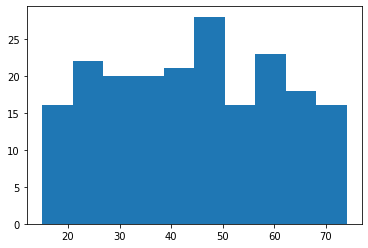

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df.Age)

(array([28., 53., 38., 26., 15., 11., 14.,  6.,  6.,  3.]),
 array([ 6.269 ,  9.4668, 12.6646, 15.8624, 19.0602, 22.258 , 25.4558,
        28.6536, 31.8514, 35.0492, 38.247 ]),
 <a list of 10 Patch objects>)

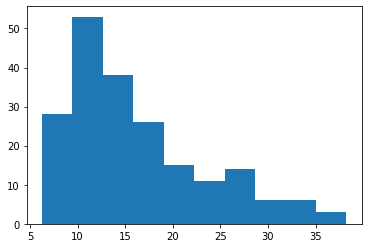

In [ ]:
plt.hist(df.Na_to_K)

(array([ 9., 13., 31., 35., 28., 23., 21., 18., 14.,  8.]),
 array([1.83561685, 2.01646168, 2.19730651, 2.37815133, 2.55899616,
        2.73984099, 2.92068582, 3.10153064, 3.28237547, 3.4632203 ,
        3.64406513]),
 <a list of 10 Patch objects>)

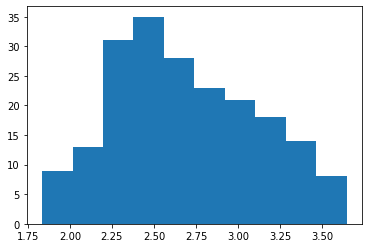

In [ ]:
plt.hist(np.log(df.Na_to_K))

TRAIN TEST SPLIT FUNCTION:-

In [ ]:
# CUSTOM SPLIT
X = df.drop(columns='Drug')
y = df.Drug
datasize = df.shape[0] # 200

def train_test_custom(X,y,i_test): # 5 splits in Kfold
  batch = len(X)//5
  for i in range(5):
    if(i==i_test):
      X_test = X.iloc[i*batch:(i+1)*batch]
      y_test = y.iloc[i*batch:(i+1)*batch]
    else:
      try:
        X_train = np.concatenate((X_train, X.iloc[i*batch:(i+1)*batch]), axis = 0)
        y_train = np.concatenate((y_train, y.iloc[i*batch:(i+1)*batch]), axis = 0)
      except:
        X_train = X.iloc[i*batch:(i+1)*batch]
        y_train = y.iloc[i*batch:(i+1)*batch]
  return X_train,y_train,X_test,y_test

In [ ]:
# USING INBUILT LIBRARY
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=100,test_size=0.2, shuffle=True)

X_train.shape

(160, 5)

CLASSIFICATION REPORT:-

In [ ]:
# APPENDING ON RESULTS TABLE
def appending(param, accuracy, precision, f1, recall, indx):
  results.loc[indx,"Parameters"] = param
  results.loc[indx,"Accuracy"] = accuracy*100
  results.loc[indx,"Precision"] = precision*100
  results.loc[indx,"Recall"] = recall*100
  results.loc[indx,"F1-score"] = f1*100
  return indx

PIPELINE:-    

In [ ]:
def pipeline(X_train,y_train,X_test,y_test,custom=False,i_test=0, wo_prune=True, split_custom=True, depth="default"):
  if custom==False:
    if depth=="default":
      model = DecisionTreeClassifier(criterion="entropy")
    else:
      model =  DecisionTreeClassifier(criterion="entropy", max_depth=int(depth))
    model.fit(X_train,y_train)
    Y_pred = model.predict(X_test)
    param = "BASELINE_model"
  # else:
  #   Y_pred = decision_tree_classifier(X_train,y_train,X_test)
  #   param = "CUSTOM_model_itest_"+str(i_test)
  
  if wo_prune==True:
    param+="_no_prune"
  else:
    param+="_Pruned"

  if split_custom==True:
    param+="_custom_split"
  else:
    param+="_baseline_split"
  
  if depth=="default":
    param+="_depth_default"
  else:
    param+="_depth_"+depth

  return Y_pred, param

EXPERIMENTS WITH INBUILT DECISION TREE MODEL:-

In [ ]:
# BASELINE WITH INBUILT TRAIN TEST SPLIT
Y_pred, param = pipeline(X_train,y_train,X_test,y_test, custom=False, i_test=0, wo_prune=True, split_custom=False)
accuracy = accuracy_score(y_test, Y_pred)
report = classification_report(y_test, Y_pred, output_dict=True)
precision =  report['macro avg']['precision'] 
recall = report['macro avg']['recall']    
f1 = report['macro avg']['f1-score']
indx = appending(param, accuracy, precision, f1, recall, indx)
indx += 1

# BASELINE WITH CUSTOM 5 KFOLD VALIDATION
accuracy = 0
f1 = 0
precision = 0
recall = 0
for i_test in range(5):
  X_train,y_train,X_test,y_test = train_test_custom(X,y,i_test)
  Y_pred, param = pipeline(X_train,y_train,X_test,y_test, custom=False, i_test=0, wo_prune=True, split_custom=True) 
  accuracy += accuracy_score(y_test, Y_pred)
  report = classification_report(y_test, Y_pred, output_dict=True)
  precision +=  report['macro avg']['precision'] 
  recall += report['macro avg']['recall']    
  f1 += report['macro avg']['f1-score']

  if(i_test==4):
    accuracy /= 5.0
    precision /= 5.0
    recall /= 5.0
    f1 /= 5.0
    indx = appending(param, accuracy, precision, f1, recall, indx)
    indx += 1

In [ ]:
# HYPERTUNING THE DEPTH OF BASELINE MODEL WITH INBUILT VAL SPLIT
dep=[]
acc=[]

for i in range(1,11):
  Y_pred, param = pipeline(X_train,y_train,X_test,y_test, custom=False, i_test=0, wo_prune=True, split_custom=False, depth=str(i))
  accuracy = accuracy_score(y_test, Y_pred)
  report = classification_report(y_test, Y_pred, output_dict=True)
  precision =  report['macro avg']['precision'] 
  recall = report['macro avg']['recall']    
  f1 = report['macro avg']['f1-score']
  indx = appending(param, accuracy, precision, f1, recall, indx)
  indx += 1
  acc.append(accuracy)
  dep.append(i)

Text(0.5, 1.0, 'inbuilt model with train test split(0.2)')

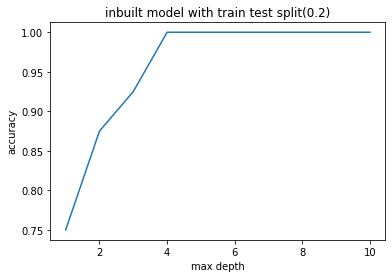

In [ ]:
plt.plot(dep,acc)
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.title("inbuilt model with train test split(0.2)")

In [ ]:
# HYPERTUNING THE DEPTH OF BASELINE MODEL WITH CUSTOM 5 KFOLD SPLITTING
dep=[]
acc=[]

for i in range(1,11):
  accuracy = 0
  f1 = 0
  precision = 0
  recall = 0
  for i_test in range(5):
    X_train,y_train,X_test,y_test = train_test_custom(X,y,i_test)
    Y_pred, param = pipeline(X_train,y_train,X_test,y_test, custom=False, i_test=0, wo_prune=True, split_custom=True, depth=str(i)) 
    accuracy += accuracy_score(y_test, Y_pred)
    report = classification_report(y_test, Y_pred, output_dict=True)
    precision +=  report['macro avg']['precision'] 
    recall += report['macro avg']['recall']    
    f1 += report['macro avg']['f1-score']

    if(i_test==4):
      accuracy /= 5.0
      precision /= 5.0
      recall /= 5.0
      f1 /= 5.0
      indx = appending(param, accuracy, precision, f1, recall, indx)
      indx += 1
  acc.append(accuracy)
  dep.append(i)

Text(0.5, 1.0, 'inbuilt model with 5 kfold cross val')

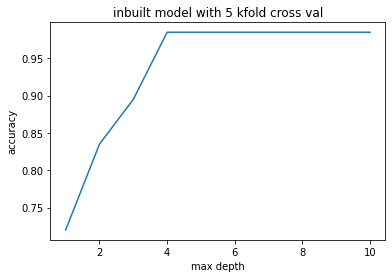

In [ ]:
plt.plot(dep,acc)
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.title("inbuilt model with 5 kfold cross val")

RESULTS TABLE:-

In [ ]:
results

Parameters Accuracy  Precision  \
0   BASELINE_model_no_prune_baseline_split_depth_d...    100.0      100.0   
1   BASELINE_model_no_prune_custom_split_depth_def...     98.5      98.75   
2      BASELINE_model_no_prune_baseline_split_depth_1     75.0       30.0   
3      BASELINE_model_no_prune_baseline_split_depth_2     87.5   49.67033   
4      BASELINE_model_no_prune_baseline_split_depth_3     92.5  75.384615   
5      BASELINE_model_no_prune_baseline_split_depth_4    100.0      100.0   
6      BASELINE_model_no_prune_baseline_split_depth_5    100.0      100.0   
7      BASELINE_model_no_prune_baseline_split_depth_6    100.0      100.0   
8      BASELINE_model_no_prune_baseline_split_depth_7    100.0      100.0   
9      BASELINE_model_no_prune_baseline_split_depth_8    100.0      100.0   
10     BASELINE_model_no_prune_baseline_split_depth_9    100.0      100.0   
11    BASELINE_model_no_prune_baseline_split_depth_10    100.0      100.0   
12       BASELINE_model_no_prune_custom_split_depth_1     72.0  29.617909   
13       BASELINE_model_no_prune_custom_split_depth_2     83.5  47.405731   
14       BASELINE_model_no_prune_custom_split_depth_3     89.5   76.62318   
15       BASELINE_model_no_prune_custom_split_depth_4     98.5      98.75   
16       BASELINE_model_no_prune_custom_split_depth_5     98.5      98.75   
17       BASELINE_model_no_prune_custom_split_depth_6     98.5      98.75   
18       BASELINE_model_no_prune_custom_split_depth_7     98.5      98.75   
19       BASELINE_model_no_prune_custom_split_depth_8     98.5      98.75   
20       BASELINE_model_no_prune_custom_split_depth_9     98.5      98.75   
21      BASELINE_model_no_prune_custom_split_depth_10     98.5      98.75   

       Recall   F1-score  
0       100.0      100.0  
1   98.036364  98.109063  
2        40.0  33.333333  
3        60.0  54.057971  
4        80.0  77.391304  
5       100.0      100.0  
6       100.0      100.0  
7       100.0      100.0  
8       100.0      100.0  
9       100.0      100.0  
10      100.0      100.0  
11      100.0      100.0  
12  39.636364  32.966206  
13  59.636364  52.248915  
14  80.218182  76.925519  
15  98.036364  98.109063  
16  98.036364  98.109063  
17  98.036364  98.109063  
18  98.036364  98.109063  
19  98.036364  98.109063  
20  98.036364  98.109063  
21  98.036364  98.109063

# Custom decision tree without pruning

PREPROCESSING DATA:-

In [ ]:
df = pd.read_csv('drug200.csv')
header = list(df.columns)

#Function to label values
#if MIN_Value <=val < (MIN_Value + Mean_Value) / 2 then label a
#if (MIN_Value + Mean_Value) / 2 <=val < Mean_Value then label b
#if (Mean_Value) <=val < (Mean_Value + MAX_Value)/2 then label c
#if (Mean_Value + MAX_Value)/2 <=val <= MAX_Value  then label d

def label(val, *boundaries):
    if (val < boundaries[0]):
        return 'a'
    elif (val < boundaries[1]):
        return 'b'
    elif (val < boundaries[2]):
        return 'c'
    else:
        return 'd'

#Function to discretize attributes into labels
def toLabel(df, old_feature_name):
    second = df[old_feature_name].mean()
    minimum = df[old_feature_name].min()
    first = (minimum + second)/2
    maximum = df[old_feature_name].max()
    third = (maximum + second)/2
    return df[old_feature_name].apply(label, args= (first, second, third))

drug_label = LabelEncoder()
df['Drug'] = drug_label.fit_transform(df['Drug'])
df['BP'] = drug_label.fit_transform(df['BP'])
df['Cholesterol'] = drug_label.fit_transform(df['Cholesterol'])
df['Sex'] = drug_label.fit_transform(df['Sex'])
df['Age_labeled'] = toLabel(df, 'Age')
df['Sex_labeled'] = toLabel(df, 'Sex')
df['Na_to_K_labeled'] = toLabel(df, 'Na_to_K')
df.drop(['Age','Sex','Na_to_K'], axis = 1, inplace = True)
lst = df.values.tolist()

# splitting the data set into train and test
trainDF, testDF = train_test_split(lst, test_size=0.2)

DECISION TREE FROM SCRATCH:-

FUNCTIONS:-

In [ ]:
def unique_vals(rows, col):
    """Find the unique values for a column in a dataset."""
    return set([row[col] for row in rows])

def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

def max_label(dict):
    """returns the maximum occuring class label as predicted class"""
    max_count = 0
    label = ""

    for key, value in dict.items():
        if dict[key] > max_count:
            max_count = dict[key]
            label = key
    return label

def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)


def partition(rows, question):
    #Partitions a dataset.
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows


def gini(rows):
    # Calculate the Gini Impurity for a list of rows
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

def entropy(rows):
    # compute the entropy.
    entries = class_counts(rows)
    avg_entropy = 0
    size = float(len(rows))
    for label in entries:
        prob = entries[label] / size
        avg_entropy = avg_entropy + (prob * math.log(prob, 2))
    return -1*avg_entropy


def info_gain(left, right, current_uncertainty):
    # Information Gain.
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * entropy(left) - (1 - p) * entropy(right)

def find_best_split(rows, header):
    # iterating over every feature / value
    best_gain = 0  # to track the best information gain
    best_question = None
    current_uncertainty = entropy(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature
        values = set([row[col] for row in rows])
        for val in values:  # for each value
            question = Question(col, val, header)
            true_rows, false_rows = partition(rows, question)

            # Skip if it doesn't divide the dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

In [ ]:
class Question:
    # A Question is used to partition a dataset.

    def __init__(self, column, value, header):
        self.column = column
        self.value = value
        self.header = header

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        # This is a method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            self.header[self.column], condition, str(self.value))
    

class Leaf:
    # A Leaf node classifies data

    def __init__(self, rows, id, depth):
        self.predictions = class_counts(rows)
        self.predicted_label = max_label(self.predictions)
        self.id = id
        self.depth = depth

class Decision_Node:
    #A Decision Node asks a question and holds a reference to the question and the two child nodes.

    def __init__(self,
                 question,
                 true_branch,
                 false_branch,
                 depth,
                 id,
                 rows):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch
        self.depth = depth
        self.id = id
        self.rows = rows


def build_tree(rows, header, depth=0, id=0):

    gain, question = find_best_split(rows, header)

    # Base case: no further info gain
    # we'll return a leaf
    if gain == 0:
        return Leaf(rows, id, depth)

    true_rows, false_rows = partition(rows, question)
    # Recursively build the true branch.
    true_branch = build_tree(true_rows, header, depth + 1, 2 * id + 2)
    # Recursively build the false branch.
    false_branch = build_tree(false_rows, header, depth + 1, 2 * id + 1)
    return Decision_Node(question, true_branch, false_branch, depth, id, rows)

def prune_tree(node, prunedList):
    # Base case
    if isinstance(node, Leaf):
        return node
    # If we reach a pruned node, the nodes below it are not considered
    if int(node.id) in prunedList:
        return Leaf(node.rows, node.id, node.depth)

    node.true_branch = prune_tree(node.true_branch, prunedList)
    node.false_branch = prune_tree(node.false_branch, prunedList)
    return node

def classify(row, node):
    # we've reached a leaf
    if isinstance(node, Leaf):
        return node.predicted_label

    # Compare the feature stored in the node to decide whether to follow true-branch/false-branch
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

def print_tree(node, spacing=""):
    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print(spacing + "Leaf id: " + str(node.id) + " Predictions: " + str(node.predictions) + " Label Class: " + str(node.predicted_label))
        return

    # Print the question at this node
   
    print(spacing + str(node.question) + " id: " + str(node.id) + " depth: " + str(node.depth))
    
    # Call this function recursively on the true branch
    print(spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print(spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")


def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs


def getLeafNodes(node, leafNodes =[],depth=[]):

    # Base case
    if isinstance(node, Leaf):
        leafNodes.append(node)
        depth.append(node.depth)
        return

    # Recursive right call for true values
    getLeafNodes(node.true_branch, leafNodes,depth)

    # Recursive left call for false values
    getLeafNodes(node.false_branch, leafNodes,depth)

    return leafNodes,depth


def getInnerNodes(node, innerNodes =[],Nodeids=[],innerdepth=[]):
    # Base case
    if isinstance(node, Leaf):
        return

    innerNodes.append(node)
    if node.id!=0:
        Nodeids.append(node.id)
        innerdepth.append(node.depth)

    # Recursive right call for true values
    getInnerNodes(node.true_branch, innerNodes,Nodeids,innerdepth)

    # Recursive left call for false values
    getInnerNodes(node.false_branch, innerNodes,Nodeids,innerdepth)

    return innerNodes,Nodeids,innerdepth

def computeAccuracy(rows, node):

    count = len(rows)
    if count == 0:
        return 0

    accuracy = 0
    for row in rows:
        # last entry of the column is the actual label
        if row[-1] == classify(row, node):
            accuracy += 1
    return round(accuracy/count, 2)

In [ ]:
def pred(rows, node):
    count = len(rows)
    Y_pred = []
    if count == 0:
        return Y_pred
    for row in rows:
        Y_pred.append(classify(row, node))
    return Y_pred

PIPELINE:-

In [ ]:
def pipeline_CUSTOM(trainDF,testDF, header,custom=False,i_test=0, wo_prune=True, split_custom=True, depth="default", print_val=False):
  if custom==True:
    model = build_tree(trainDF, header)
    if print_val==True:
      print_tree(model)
    
    Y_pred = pred(testDF, model)  
  else:
    Y_pred=[]
    
  param = "CUSTOM_model_itest_"+str(i_test)
  if wo_prune==True:
    param+="_no_prune"
  else:
    param+="_Pruned"

  if split_custom==True:
    param+="_custom_split"
  else:
    param+="_baseline_split"
  
  if depth=="default":
    param+="_depth_default"
  else:
    param+="_depth_"+depth

  return Y_pred, param

In [ ]:
# get leaf and inner nodes
# print("\nLeaf nodes ****************")
# leaves,depth = getLeafNodes(t)
# for leaf in leaves:
#     print("id = " + str(leaf.id) + " depth =" + str(leaf.depth))

# print("\nNon-leaf nodes ****************")
# innerNodes,Nodeids,innerdepth = getInnerNodes(t)

# for inner in innerNodes:
#     print("id = " + str(inner.id) + " depth =" + str(inner.depth))

In [ ]:
def train_test_kfold(df,i_test):
  batch = len(df)//5
  trainDF = []
  for i in range(5):
    if(i==i_test):
      testDF = df[i*batch:(i+1)*batch]
    else:
      trainDF.extend(df[i*batch:(i+1)*batch])
  return trainDF, testDF

In [ ]:
y_test=[]
for row in testDF:
  y_test.append(row[-1])

RUNNING THE PIPELINE:-

In [ ]:
# PRUNNING THE DEPTH OF CUSTOM MODEL WITH INBUILT VAL SPLIT
def prunning_custom(trainDF, testDF, header, print_val=False):
  t = build_tree(trainDF, header)
  innerNodes,Nodeids,innerdepth = getInnerNodes(t)
  leaves,depth = getLeafNodes(t)

  accuracy_at_depth=[]
  nodeIdToPrune = -1
  for node in innerNodes:
      if node.id != 0:
          prune_tree(t, [node.id])
          currentAccuracy = computeAccuracy(testDF, t)
          if print_val:
            print("Pruned node_id: " + str(node.id) + " to achieve accuracy: " + str(currentAccuracy*100) + "%")
          accuracy_at_depth.append(int(currentAccuracy*100))

          if currentAccuracy >= computeAccuracy(testDF, t):
              maxAccuracy = currentAccuracy
              nodeIdToPrune = node.id
          t = build_tree(trainDF, header)

          if maxAccuracy == 1:
              break

  if nodeIdToPrune != -1:
      if print_val: 
        print("\nPrinting the pruned tree")
      t = build_tree(trainDF, header)
      prune_tree(t, [nodeIdToPrune])
      print("\nFinal node Id to prune (for max accuracy): " + str(nodeIdToPrune))
  else:
      t = build_tree(trainDF, header)
      print("\nPruning strategy did'nt increased accuracy")

  print("*********** Final Tree with accuracy: " + str(maxAccuracy*100) + "%  ************")
  if print_val==True:
    print_tree(t)
  

  # plotting accuracy vs depth
  maxdepth=0
  for i in depth:
      if i>=maxdepth:
          maxdepth=i

  A= [0 for i in range(maxdepth-1)]
  d=[i+1 for i in range(0,maxdepth-1)]
  for i in range(len(accuracy_at_depth)):
      if A[innerdepth[i]-1]<accuracy_at_depth[i]:
          A[innerdepth[i]-1]=accuracy_at_depth[i]

  return t,A,d

EXPERIMENTS WITH CUSTOM DECISION TREE MODEL:-

In [ ]:
# CUSTOM MODEL WITH INBUILT TRAIN TEST SPLIT
Y_pred, param = pipeline_CUSTOM(trainDF, testDF, header,custom=True,i_test=0, wo_prune=True, split_custom=False, depth="default", print_val=True)
accuracy = accuracy_score(y_test, Y_pred)
report = classification_report(y_test, Y_pred, output_dict=True)
precision =  report['macro avg']['precision'] 
recall = report['macro avg']['recall']    
f1 = report['macro avg']['f1-score']
indx = appending(param, accuracy, precision, f1, recall, indx)
indx += 1

Is BP >= 4? id: 0 depth: 0
--> True:
  Is Age >= 2? id: 2 depth: 1
  --> True:
    Is Cholesterol == a? id: 6 depth: 2
    --> True:
      Leaf id: 14 Predictions: {'c': 4} Label Class: c
    --> False:
      Is Na_to_K == d? id: 13 depth: 3
      --> True:
        Is Sex >= 1? id: 28 depth: 4
        --> True:
          Leaf id: 58 Predictions: {'b': 1} Label Class: b
        --> False:
          Is Cholesterol == c? id: 57 depth: 5
          --> True:
            Leaf id: 116 Predictions: {'c': 1} Label Class: c
          --> False:
            Leaf id: 115 Predictions: {'b': 2, 'c': 2} Label Class: b
      --> False:
        Is Cholesterol == d? id: 27 depth: 4
        --> True:
          Is Sex >= 1? id: 56 depth: 5
          --> True:
            Leaf id: 114 Predictions: {'c': 1} Label Class: c
          --> False:
            Leaf id: 113 Predictions: {'b': 1, 'c': 1} Label Class: b
        --> False:
          Leaf id: 55 Predictions: {'c': 5} Label Class: c
  --> False:
    Is

In [ ]:
# CUSTOM MODEL WITH CUSTOM 5 KFOLD cross validation
accuracy = 0
f1 = 0
precision = 0
recall = 0
for i_test in range(5):
  trainDF, testDF = train_test_kfold(lst,i_test)
  Y_pred, param = pipeline_CUSTOM(trainDF, testDF, header,custom=True,i_test=0, wo_prune=True, split_custom=True, depth="default", print_val=False)
  accuracy += accuracy_score(y_test, Y_pred)
  report = classification_report(y_test, Y_pred, output_dict=True)
  precision +=  report['macro avg']['precision'] 
  recall += report['macro avg']['recall']    
  f1 += report['macro avg']['f1-score']

  if(i_test==4):
    accuracy /= 5.0
    precision /= 5.0
    recall /= 5.0
    f1 /= 5.0
    indx = appending(param, accuracy, precision, f1, recall, indx)
    indx += 1

# Custom decision tree with prunning

In [ ]:
# PRUNED CUSTOM DECISION TREE ON TRAIN TEST SPLIT
t,A,d = prunning_custom(trainDF,testDF, header, print_val=True)
Y_pred, param = pipeline_CUSTOM(trainDF, testDF, header,custom=False,i_test=0, wo_prune=False, split_custom=False, depth="default", print_val=False)
Y_pred = pred(testDF, t)  
accuracy = accuracy_score(y_test, Y_pred)
report = classification_report(y_test, Y_pred, output_dict=True)
precision =  report['macro avg']['precision'] 
recall = report['macro avg']['recall']    
f1 = report['macro avg']['f1-score']
indx = appending(param, accuracy, precision, f1, recall, indx)
indx += 1

Pruned node_id: 2 to achieve accuracy: 62.0%
Pruned node_id: 6 to achieve accuracy: 45.0%
Pruned node_id: 14 to achieve accuracy: 45.0%
Pruned node_id: 29 to achieve accuracy: 45.0%
Pruned node_id: 59 to achieve accuracy: 45.0%
Pruned node_id: 5 to achieve accuracy: 62.0%
Pruned node_id: 12 to achieve accuracy: 55.00000000000001%
Pruned node_id: 26 to achieve accuracy: 47.0%
Pruned node_id: 25 to achieve accuracy: 53.0%
Pruned node_id: 52 to achieve accuracy: 45.0%
Pruned node_id: 105 to achieve accuracy: 45.0%
Pruned node_id: 51 to achieve accuracy: 53.0%
Pruned node_id: 104 to achieve accuracy: 50.0%
Pruned node_id: 210 to achieve accuracy: 47.0%
Pruned node_id: 209 to achieve accuracy: 45.0%
Pruned node_id: 103 to achieve accuracy: 47.0%
Pruned node_id: 208 to achieve accuracy: 45.0%
Pruned node_id: 207 to achieve accuracy: 45.0%
Pruned node_id: 11 to achieve accuracy: 53.0%
Pruned node_id: 24 to achieve accuracy: 53.0%
Pruned node_id: 49 to achieve accuracy: 47.0%
Pruned node_id: 1

Text(0.5, 1.0, 'pruned custom model with train test split(0.2)')

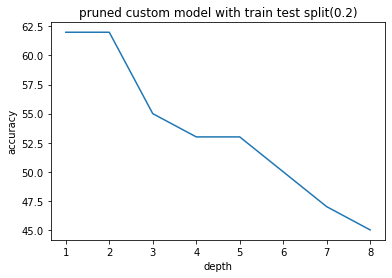

In [ ]:
plt.plot(d,A)
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('pruned custom model with train test split(0.2)')

In [ ]:
# PRUNED CUSTOM MODEL WITH CUSTOM 5 KFOLD cross validation
accuracy = 0
f1 = 0
precision = 0
recall = 0
for i_test in range(5):
  trainDF, testDF = train_test_kfold(lst,i_test)
  t,A,d = prunning_custom(trainDF,testDF, header, print_val=False)
  Y_pred, param = pipeline_CUSTOM(trainDF, testDF, header,custom=False,i_test=0, wo_prune=False, split_custom=True, depth="default", print_val=False)
  Y_pred = pred(testDF, t)  
  accuracy += accuracy_score(y_test, Y_pred)
  report = classification_report(y_test, Y_pred, output_dict=True)
  precision +=  report['macro avg']['precision'] 
  recall += report['macro avg']['recall']    
  f1 += report['macro avg']['f1-score']

  if(i_test==4):
    accuracy /= 5.0
    precision /= 5.0
    recall /= 5.0
    f1 /= 5.0
    indx = appending(param, accuracy, precision, f1, recall, indx)
    indx += 1


Final node Id to prune (for max accuracy): 127
*********** Final Tree with accuracy: 50.0%  ************

Final node Id to prune (for max accuracy): 63
*********** Final Tree with accuracy: 56.99999999999999%  ************

Final node Id to prune (for max accuracy): 32
*********** Final Tree with accuracy: 50.0%  ************

Final node Id to prune (for max accuracy): 67
*********** Final Tree with accuracy: 53.0%  ************

Final node Id to prune (for max accuracy): 31
*********** Final Tree with accuracy: 45.0%  ************


Text(0.5, 1.0, 'pruned custom model with 5 kfold')

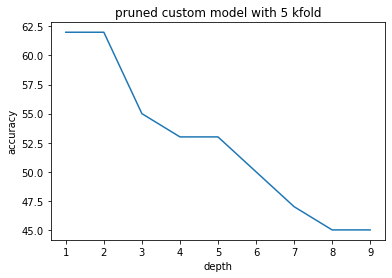

In [ ]:
plt.plot(d,A)
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('pruned custom model with 5 kfold')

RESULTS TABLE:-

In [ ]:
results

Parameters Accuracy  Precision  \
0   BASELINE_model_no_prune_baseline_split_depth_d...    100.0      100.0   
1   BASELINE_model_no_prune_custom_split_depth_def...     98.5      98.75   
2      BASELINE_model_no_prune_baseline_split_depth_1     75.0       30.0   
3      BASELINE_model_no_prune_baseline_split_depth_2     87.5   49.67033   
4      BASELINE_model_no_prune_baseline_split_depth_3     92.5  75.384615   
5      BASELINE_model_no_prune_baseline_split_depth_4    100.0      100.0   
6      BASELINE_model_no_prune_baseline_split_depth_5    100.0      100.0   
7      BASELINE_model_no_prune_baseline_split_depth_6    100.0      100.0   
8      BASELINE_model_no_prune_baseline_split_depth_7    100.0      100.0   
9      BASELINE_model_no_prune_baseline_split_depth_8    100.0      100.0   
10     BASELINE_model_no_prune_baseline_split_depth_9    100.0      100.0   
11    BASELINE_model_no_prune_baseline_split_depth_10    100.0      100.0   
12       BASELINE_model_no_prune_custom_split_depth_1     72.0  29.617909   
13       BASELINE_model_no_prune_custom_split_depth_2     83.5  47.405731   
14       BASELINE_model_no_prune_custom_split_depth_3     89.5   76.62318   
15       BASELINE_model_no_prune_custom_split_depth_4     98.5      98.75   
16       BASELINE_model_no_prune_custom_split_depth_5     98.5      98.75   
17       BASELINE_model_no_prune_custom_split_depth_6     98.5      98.75   
18       BASELINE_model_no_prune_custom_split_depth_7     98.5      98.75   
19       BASELINE_model_no_prune_custom_split_depth_8     98.5      98.75   
20       BASELINE_model_no_prune_custom_split_depth_9     98.5      98.75   
21      BASELINE_model_no_prune_custom_split_depth_10     98.5      98.75   
22  CUSTOM_model_itest_0_no_prune_baseline_split_d...     57.5  54.166667   
23  CUSTOM_model_itest_0_no_prune_custom_split_dep...     28.0  24.557676   
24  CUSTOM_model_itest_0_Pruned_baseline_split_dep...     20.0  15.795455   
25  CUSTOM_model_itest_0_Pruned_custom_split_depth...     28.5  24.901846   

       Recall   F1-score  
0       100.0      100.0  
1   98.036364  98.109063  
2        40.0  33.333333  
3        60.0  54.057971  
4        80.0  77.391304  
5       100.0      100.0  
6       100.0      100.0  
7       100.0      100.0  
8       100.0      100.0  
9       100.0      100.0  
10      100.0      100.0  
11      100.0      100.0  
12  39.636364  32.966206  
13  59.636364  52.248915  
14  80.218182  76.925519  
15  98.036364  98.109063  
16  98.036364  98.109063  
17  98.036364  98.109063  
18  98.036364  98.109063  
19  98.036364  98.109063  
20  98.036364  98.109063  
21  98.036364  98.109063  
22  51.650433  50.993125  
23  23.939394  23.930359  
24  16.341991  16.041979  
25  24.356061  24.288583